# DS MIP - Player Position Prediction

by Shreyas(1811049) & Sanyam (1811040)


### Packages

In [ ]:
# Intsalling packages
system('sudo apt-get install -y librsvg2-dev', intern=TRUE) #System Packages
install.packages("hrbrthemes") #Package for themes
install.packages('caret', dependencies = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [6] "  libcairo-script-interpreter2 libcairo2-dev libgdk-pixbuf2.0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
 [7] "  libpixman-1-dev libxcb-shm0-dev"                                                                                     

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘extrafont’, ‘gdtools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘sass’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘fastmatch’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mlr’, ‘doParallel’, ‘FNN’, ‘iterators’, ‘gower’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, 

In [ ]:
library(devtools)
install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
install.packages("Rtsne")
install.packages("kohonen")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Import packages
library(tidyverse)  # for data wrangling
library(stringr)    # for string manipulations
library(ggbiplot)   # pca biplot with ggplot
library(Rtsne)      # implements the t-SNE algorithm
library(kohonen)    # implements self organizing maps
library(hrbrthemes) # nice themes for ggplot
library(GGally)     # to produce scatterplot matrices
library(tidyr)
library(caret)

### Dataset - Dimensionality Reduction

Need: There are many good reasons for reducing the dimension of data sets with a large amount of features. For example, to get rid of correlated variables or speeding up computations. 



In [ ]:
#Importing data
fifa_tbl <- read.csv("fifa_tbl.csv")
fifa_tbl[, c(13:63)] <- sapply(fifa_tbl[, c(13:63)], as.integer)
glimpse(fifa_tbl)

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“N

Rows: 17,981
Columns: 75
$ X                   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Name                <chr> "Cristiano Ronaldo", "L. Messi", "Neymar", "L. Suá…
$ Age                 <int> 32, 30, 25, 30, 31, 28, 26, 26, 27, 29, 31, 26, 25…
$ Photo               <chr> "https://cdn.sofifa.org/48/18/players/20801.png", …
$ Nationality         <chr> "Portugal", "Argentina", "Brazil", "Uruguay", "Ger…
$ Flag                <chr> "https://cdn.sofifa.org/flags/38.png", "https://cd…
$ Overall             <int> 94, 93, 92, 92, 92, 91, 90, 90, 90, 90, 90, 89, 89…
$ Potential           <int> 94, 93, 94, 92, 92, 91, 92, 91, 90, 90, 90, 92, 92…
$ Club                <chr> "Real Madrid CF", "FC Barcelona", "Paris Saint-Ger…
$ Club.Logo           <chr> "https://cdn.sofifa.org/24/18/teams/243.png", "htt…
$ Value               <chr> "€95.5M", "€105M", "€123M", "€97M", "€61M", "€92M"…
$ Wage                <chr> "€565K", "€565K", "€280K", "€510K", "€230K", "€355…
$ Special      

In [ ]:
#Creating a column indicating if the position is in defense, midfield or offense. Goalkeepers are treated separately.

fifa_tbl <- fifa_tbl %>%
  mutate(position = word(Preferred.Positions,1)) 

defense  <- c("CB","RB","LB","RWB","LWB")
midfield <- c("CDM","CM","RM","LM","CAM")
offense  <- c("CF","RW","LW","ST")   
 
fifa_tbl <- fifa_tbl %>% 
  mutate(position2 = ifelse(position %in% defense,"D", ifelse(position %in% midfield,"M", ifelse(position %in% offense,"O","GK")))) %>% 
  mutate(position2 = factor(position2,levels = c("GK","D","M","O"))) %>% 
  select(-'Preferred.Positions')

In [ ]:
glimpse(fifa_tbl)

Rows: 17,981
Columns: 76
$ X                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ Name               <chr> "Cristiano Ronaldo", "L. Messi", "Neymar", "L. Suár…
$ Age                <int> 32, 30, 25, 30, 31, 28, 26, 26, 27, 29, 31, 26, 25,…
$ Photo              <chr> "https://cdn.sofifa.org/48/18/players/20801.png", "…
$ Nationality        <chr> "Portugal", "Argentina", "Brazil", "Uruguay", "Germ…
$ Flag               <chr> "https://cdn.sofifa.org/flags/38.png", "https://cdn…
$ Overall            <int> 94, 93, 92, 92, 92, 91, 90, 90, 90, 90, 90, 89, 89,…
$ Potential          <int> 94, 93, 94, 92, 92, 91, 92, 91, 90, 90, 90, 92, 92,…
$ Club               <chr> "Real Madrid CF", "FC Barcelona", "Paris Saint-Germ…
$ Club.Logo          <chr> "https://cdn.sofifa.org/24/18/teams/243.png", "http…
$ Value              <chr> "€95.5M", "€105M", "€123M", "€97M", "€61M", "€92M",…
$ Wage               <chr> "€565K", "€565K", "€280K", "€510K", "€230K", "€355K…
$ Special      

In [ ]:
#Removing redundant columns
fifa_tbl <- within(fifa_tbl, rm("X","CB","RB","LB","RWB","LWB","CDM","CM","RM","LM","CAM","CF","RW","LW","ST","LAM","LCB","LCM","LDM","LF","LS","RAM","RCB","RCM","RDM","RF","RS","Name","Age","Photo","Nationality","ID","Club","Flag","Overall","Potential","Club.Logo","Value","Wage","Special"))

In [ ]:
#Removing rows with NA values
fifa_tbl <- drop_na(fifa_tbl)

#### Using PCA to reduce dimensionality

In [ ]:
fifa_pca <- fifa_tbl %>% 
  select(Acceleration:Volleys) %>%
  prcomp(center=TRUE,scale.=TRUE,retx=TRUE)

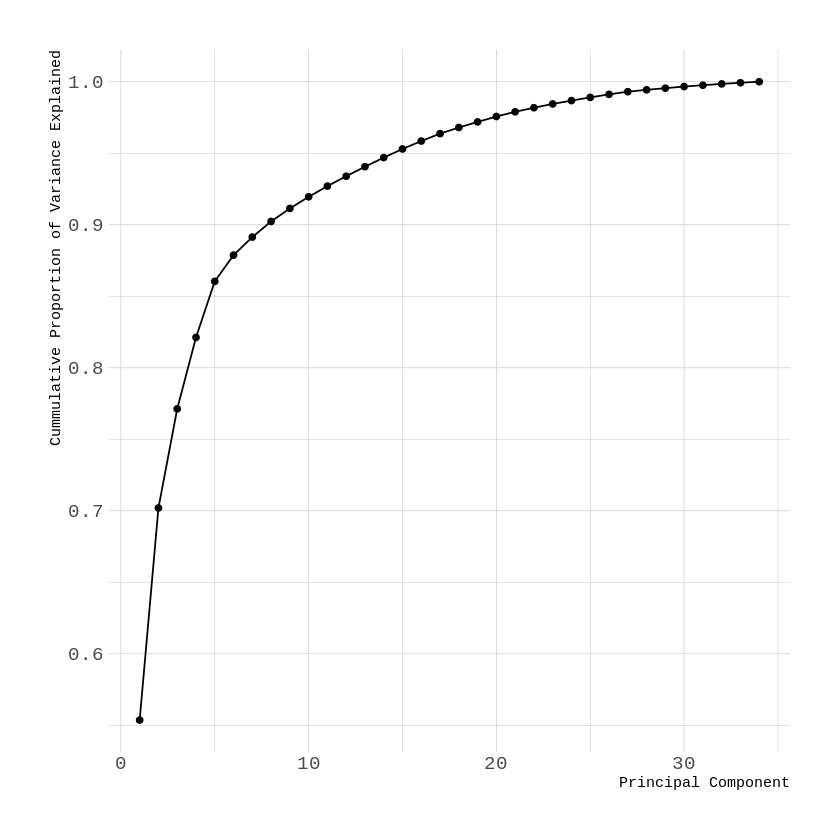

In [ ]:
tibble(sd = fifa_pca$sdev, 
       pc = 1:length(sd)) %>% 
  mutate(cumvar = cumsum((sd^2)/sum(sd^2))) %>% 
  ggplot(aes(pc,cumvar))+geom_line()+geom_point()+
  labs(x="Principal Component",y="Cummulative Proportion of Variance Explained")+
  theme_ipsum_rc()

Roughly 70% of the variance is explained by the first two components. To explain 90% of the variance, we have to go up to the 8th component.

To visualize the result of the PCA, we use the ggbiplot() function from the ggbiplot package. As the name suggests, it creates a biplot in ggplot style.

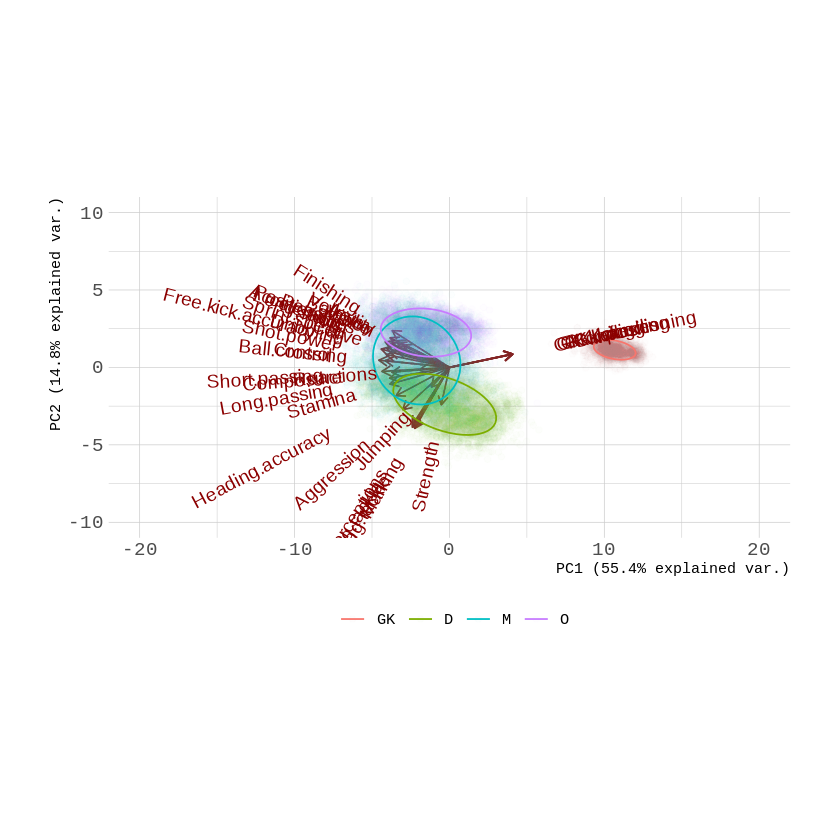

In [ ]:
ggbiplot(fifa_pca, obs.scale = 1, var.scale = 1, alpha = 0.01,
         groups = fifa_tbl$position2, varname.size = 4, varname.adjust = 2,
         ellipse = TRUE, circle = FALSE) +
  scale_color_discrete(name = '') +
  scale_x_continuous(limits = c(-20,20))+
  scale_y_continuous(limits = c(-10,10))+
  theme_ipsum_rc()+
  theme(legend.direction = 'horizontal', legend.position = 'bottom')

Since we have a lot of features, this unfortunately results in some overplotting. However, general patterns are still visible. The first component clearly distinguishes goalkeepers from the rest of the players, which we already expected from examining a few scatterplots.

#### t-SNE for dimensionality reduction

t-SNE is a non-linear dimensionality reduction algorithm that seeks to finds patterns in the data by identifying clusters based on similarity of data points.

In [ ]:
set.seed(12)

fifa_tsne <- fifa_tbl %>%
  select(Acceleration:Volleys) %>%
Rtsne(perplexity = 50, max_iter = 1000, check_duplicates = FALSE)

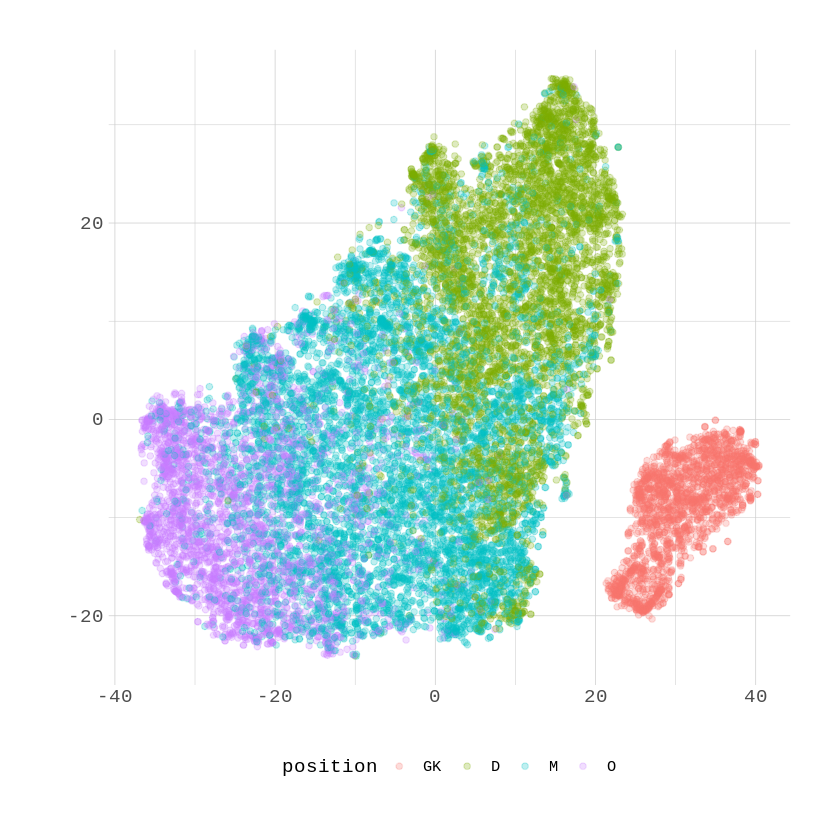

In [ ]:
tibble(x = fifa_tsne$Y[,1],
       y = fifa_tsne$Y[,2],
       position = fifa_tbl$position2) %>%
  ggplot(aes(x,y)) + geom_point(aes(col = position), alpha = 0.25) +
  theme_ipsum_rc()+
  theme(legend.position = "bottom")+
  labs(x="",y="")

For the FIFA 18 player data, the t-SNE algorithm took several minutes to run. PCA is deterministic, meaning that each run on the same data gives the same results. t-SNE is not. 

### KNN Algorithm for prediction of player positions

#### Test and Training Dataset

In [ ]:
set.seed(6185)

train_sample <- createDataPartition(fifa_tbl$position2,p = 0.8,list = FALSE)
train_data   <- fifa_tbl[train_sample,] %>% select(-position) 
test_data    <- fifa_tbl[-train_sample,] %>% select(-position) 

#### KNN Model

In [ ]:
train_control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
grid_knn <- expand.grid(.k=seq(20,120,5))
fifa_knn <- train(position2~., data=train_data, method = "knn",
                   trControl = train_control,preProcess = c("center","scale"),
                   tuneGrid = grid_knn)

In [ ]:
fifa_knn

k-Nearest Neighbors 

13858 samples
   34 predictor
    4 classes: 'GK', 'D', 'M', 'O' 

Pre-processing: centered (33), scaled (33) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 12471, 12472, 12473, 12474, 12472, 12471, ... 
Resampling results across tuning parameters:

  k    Accuracy   Kappa    
   20  0.8179390  0.7386652
   25  0.8200320  0.7416799
   30  0.8217868  0.7441267
   35  0.8221241  0.7445601
   40  0.8222201  0.7445956
   45  0.8223883  0.7447338
   50  0.8218591  0.7439364
   55  0.8229178  0.7454584
   60  0.8225811  0.7448906
   65  0.8227256  0.7450462
   70  0.8226774  0.7449330
   75  0.8224127  0.7445302
   80  0.8226538  0.7448531
   85  0.8219803  0.7438390
   90  0.8214986  0.7431062
   95  0.8211858  0.7426057
  100  0.8212584  0.7426750
  105  0.8208735  0.7420861
  110  0.8212101  0.7425144
  115  0.8201035  0.7409125
  120  0.8200796  0.7408326

Accuracy was used to select the optimal model using the largest value.
The 

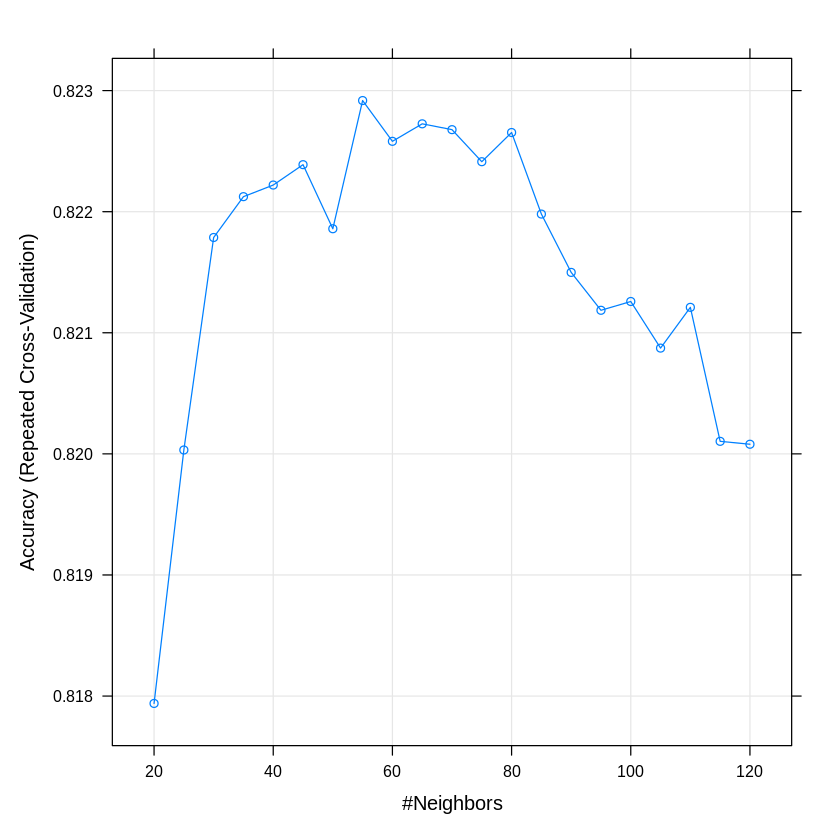

In [ ]:
plot(fifa_knn)

In [ ]:
fifa_knn_predict <- predict(fifa_knn,newdata = test_data)
confusionMatrix(fifa_knn_predict,test_data$position2)

Confusion Matrix and Statistics

          Reference
Prediction   GK    D    M    O
        GK  394    0    0    0
        D     0  900  150    9
        M     0  151 1116  207
        O     0    0  111  426

Overall Statistics
                                          
               Accuracy : 0.8187          
                 95% CI : (0.8055, 0.8314)
    No Information Rate : 0.3975          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7397          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: D Class: M Class: O
Sensitivity             1.0000   0.8563   0.8105   0.6636
Specificity             1.0000   0.9341   0.8285   0.9607
Pos Pred Value          1.0000   0.8499   0.7571   0.7933
Neg Pred Value          1.0000   0.9372   0.8688   0.9262
Prevalence              0.1137   0.3034   0.3975   0.1853
Detection Rate

#### Prediction

In [ ]:
test_data

,Acceleration,Aggression,Agility,Balance,Ball.control,Composure,Crossing,Curve,Dribbling,Finishing,⋯,Short.passing,Shot.power,Sliding.tackle,Sprint.speed,Stamina,Standing.tackle,Strength,Vision,Volleys,position2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
7,57,38,60,43,42,64,17,21,18,13,⋯,50,31,13,58,40,21,64,68,13,GK
10,78,50,75,69,85,86,68,74,84,91,⋯,75,88,18,80,72,22,85,70,88,O
14,88,80,90,87,87,86,80,78,90,85,⋯,81,84,35,84,85,39,72,83,83,M
15,75,62,93,94,92,84,78,79,86,71,⋯,92,73,73,71,82,80,58,90,74,M
19,49,38,55,49,28,70,13,20,26,15,⋯,37,39,11,43,39,11,69,50,17,GK
25,62,82,60,52,75,84,44,56,69,39,⋯,79,74,88,72,73,88,85,74,58,D
26,72,82,58,53,71,86,69,56,67,34,⋯,75,79,90,78,74,91,91,76,53,D
30,65,31,55,54,34,61,13,11,10,10,⋯,50,23,18,63,41,10,43,30,11,GK
32,63,84,81,41,88,91,76,82,82,87,⋯,84,91,27,67,71,41,88,83,90,O


In [ ]:
predict <- predict(fifa_knn,newdata = test_data)
predict

[1] GK O  O  M  GK D  D  GK O  M  GK M  M  M  D  D  D  M  M  GK D  M  D  D 
  [25] M  O  GK GK M  D  O  D  GK O  M  D  M  M  M  M  GK M  M  M  D  D  M  M 
  [49] D  D  M  M  M  D  O  M  GK GK GK D  M  D  M  D  M  M  O  O  O  M  GK M 
  [73] D  M  O  M  M  O  M  M  M  M  M  M  D  M  O  M  D  GK O  D  GK M  D  D 
  [97] M  M  M  D  D  M  O  M  M  D  D  D  D  D  GK O  M  M  GK D  M  M  M  D 
 [121] M  D  D  D  O  GK M  M  M  M  D  D  M  M  O  M  M  M  D  D  O  M  M  M 
 [145] O  O  GK GK D  M  M  M  D  M  M  D  M  M  M  O  D  M  M  M  O  O  M  D 
 [169] O  M  M  D  D  M  D  D  D  M  M  M  GK GK M  M  M  M  M  M  M  D  O  M 
 [193] GK M  D  D  D  O  M  M  O  GK D  D  M  D  GK D  M  M  M  M  D  M  D  M 
 [217] D  O  M  M  M  D  D  M  M  M  O  M  D  M  D  GK GK M  M  D  M  M  M  M 
 [241] D  D  D  O  M  M  M  GK O  M  M  O  M  M  GK M  M  D  D  D  D  M  O  D 
 [265] GK D  D  D  M  M  M  GK M  GK D  M  M  D  M  D  D  D  D  GK D  D  O  D 
 [289] D  GK M  M  M  GK M  M  GK O  D  O  D  M  D  M  M  D  O  M  M  M  M  D 
 [313] D  O  M  M  M  M  M  D  O  D  M  O  M  GK D  D  M  M  O  M  O  O  M  M 
 [337] M  D  M  GK O  O  O  M  GK D  D  O  D  D  GK M  M  M  M  M  D  GK M  D 
 [361] D  M  M  M  D  M  M  O  O  D  O  D  GK D  O  D  O  GK M  O  D  O  M  O 
 [385] M  D  M  D  M  D  D  M  GK M  D  M  D  M  O  M  M  D  M  M  D  M  D  D 
 [409] O  D  M  GK M  O  D  D  D  M  M  O  M  M  D  M  D  O  M  M  D  M  M  D 
 [433] M  D  M  D  M  M  M  D  M  M  M  D  M  M  D  D  M  M  GK GK D  GK O  D 
 [457] M  M  M  GK O  GK D  M  D  M  M  M  M  M  O  M  D  M  M  D  M  M  M  D 
 [481] M  D  D  O  O  O  M  O  M  GK M  M  D  M  O  D  D  M  D  M  M  D  D  M 
 [505] GK D  M  D  M  D  M  M  GK M  M  O  M  O  M  M  GK M  D  M  M  M  GK M 
 [529] D  D  M  M  M  O  M  M  M  M  M  D  O  D  O  M  D  M  M  O  M  O  D  M 
 [553] O  M  M  M  M  D  M  GK M  D  M  M  D  O  D  M  O  O  D  M  D  M  GK M 
 [577] D  D  M  O  M  D  D  D  D  M  D  GK M  GK D  D  D  GK O  M  M  D  D  M 
 [601] M  D  M  D  M  M  D  D  O  M  GK O  GK O  M  M  D  D  GK M  O  M  O  D 
 [625] M  O  D  O  M  O  M  GK M  D  M  M  D  D  D  M  M  M  GK M  D  D  M  M 
 [649] O  D  M  M  D  O  D  D  O  M  GK GK O  M  D  D  D  D  GK M  M  M  O  D 
 [673] D  O  M  M  O  O  GK M  GK M  M  D  D  M  O  M  M  O  D  O  M  M  D  M 
 [697] O  M  D  M  O  D  GK M  M  GK M  D  GK M  M  D  M  M  M  D  M  M  D  GK
 [721] D  D  M  O  M  D  M  D  M  M  M  D  D  M  M  M  M  M  D  D  D  D  D  D 
 [745] O  M  D  M  M  D  M  D  GK M  M  O  O  D  M  M  M  D  D  D  M  M  M  M 
 [769] M  M  D  M  O  GK M  M  M  M  M  O  M  M  M  O  M  M  O  M  D  GK M  M 
 [793] O  M  M  GK M  D  M  M  D  M  D  D  GK M  M  D  O  O  M  O  M  M  O  D 
 [817] M  M  O  M  M  O  D  M  M  D  M  M  M  D  D  M  D  M  D  D  D  D  M  D 
 [841] M  D  M  D  D  M  M  O  D  M  M  D  M  O  D  GK D  D  M  D  O  D  D  M 
 [865] D  M  M  GK D  D  M  M  D  O  D  M  D  D  O  M  D  D  M  D  M  M  O  O 
 [889] D  M  GK D  O  D  M  D  M  M  O  M  M  D  D  D  M  M  D  M  M  M  M  D 
 [913] GK M  D  M  M  O  O  M  M  D  D  GK D  M  D  D  D  M  GK M  D  M  M  O 
 [937] D  M  D  O  D  M  M  GK D  O  D  M  M  M  O  D  D  D  M  M  M  GK M  GK
 [961] M  GK M  O  M  D  M  D  M  D  M  M  M  M  M  O  O  M  M  M  M  D  M  M 
 [985] O  D  M  D  D  D  GK M  D  M  O  M  GK M  M  D  M  D  M  GK GK GK D  M 
[1009] M  M  D  D  D  O  M  M  M  M  M  M  O  M  GK D  D  M  M  M  GK D  M  O 
[1033] O  D  D  D  D  M  O  D  M  M  D  M  GK D  D  D  GK M  D  O  M  M  M  M 
[1057] D  M  O  O  M  M  M  M  M  GK D  M  M  D  D  D  O  M  O  M  D  D  M  M 
[1081] GK M  D  D  M  M  O  O  M  D  D  O  O  D  M  D  M  M  GK M  O  D  M  D 
[1105] D  GK M  M  M  D  M  M  D  M  M  M  D  O  D  O  O  M  M  D  D  O  M  M 
[1129] O  D  D  M  M  M  GK O  M  O  D  M  O  M  GK M  M  O  D  D  M  D  D  D 
[1153] D  D  M  M  M  D  O  M  M  D  O  O  M  D  O  M  D  M  D  M  M  M  D  M 
[1177] M  D  O  M  GK O  O  M  O  O  D  D  M  D  M  O  O  M  M  M  D  M  D  M 
[1201] D  D  D  D  GK D  M  M  M  D  D  O  GK M  O  D